### $\text{TD} (\lambda)$ in a random grid

In [1]:
%cd ../..

/Users/edwardgunn/Documents/4YP/DistributedReinforcementLearningOnTheEdge


Action values: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}, Best action: 0, Actual action: 0
V:
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 

Action values: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}, Best action: 0, Actual action: 0
Observable state: (0, 0)
Possible actions: [0, 1, 2, 3, 4]
Step: 0
---------------------------------
State: (0, 0)
Possible actions: [0, 1, 2, 3, 4]
Reward: -1
Action values: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}, Best action: 0, Actual action: 0
Step: 1
---------------------------------
State: (0, 0)
Possible actions: [0, 1, 2, 3,

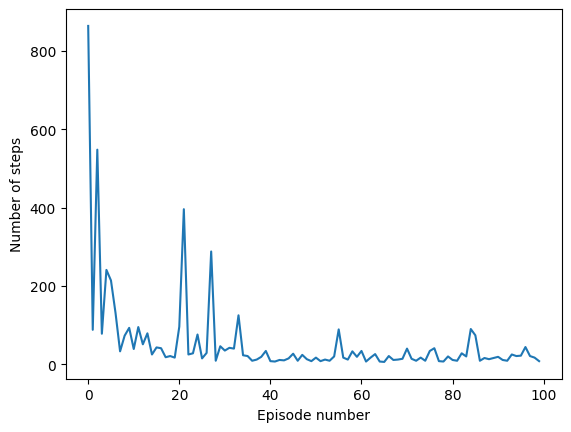

In [2]:
from SingleAgentTests.Agents.TDlambda import TDlambda
from SingleAgentTests.Environments.RandomGrid import RandomGrid
from SingleAgentTests.Universe import Universe
import matplotlib.pyplot as plt
gridSize = 10
terminal = (7,3)
environment = RandomGrid()
initailState = environment.getObservableState()
possibleAction = environment.getPossibleActions()
allStateActions = environment.getAllPossibleStateActions()
agent = TDlambda(0.9, 0.01, 0.9, 0.5, initailState, possibleAction, allStateActions)
universe = Universe(environment, agent)
universe.trainMany(100, RandomGrid)
stepCounts = [entry[4] for entry in universe.getHistory() if entry[4] is not None]
print(stepCounts)
plt.plot(stepCounts)
plt.xlabel("Episode number")
plt.ylabel("Number of steps")
plt.show()

In [3]:
import pygame
import time
import random

pygame.init()

displayWidth = 400
topMargin = displayWidth/10
displayHeight = displayWidth + topMargin
squareSize = displayWidth/gridSize
black = (0,0,0)
white = (255,255,255)
red = (255,0,0)
blue = (0,0,255)
episode = 1
gameDisplay = pygame.display.set_mode((displayWidth,displayHeight))
gameDisplay.fill(white)
pygame.display.set_caption('SimpleGridVisualisation')

font = pygame.font.Font('freesansbold.ttf', 32)

#######
def drawGrid(width, height, terminal):
    pygame.draw.rect(gameDisplay, red, [squareSize*terminal[0], squareSize*terminal[1] + topMargin, squareSize, squareSize])
    for w in range(width):
        for h in range(height):
            pygame.draw.rect(gameDisplay, black, [squareSize*w, squareSize*h + topMargin, squareSize, squareSize], 1)
            font = pygame.font.Font('freesansbold.ttf', 20)
            text = font.render(f"{w},{h}", True, black)
 
            textRect = text.get_rect()
            
            textRect.center = (squareSize*(w+0.5), squareSize*(h+0.5) + topMargin)
            gameDisplay.blit(text, textRect)

#######

def drawAgent(x,y):
    pygame.draw.circle(gameDisplay, blue, [squareSize*(x+0.5), squareSize*(y+0.5) + topMargin], squareSize/2)

for step in universe.getHistory():
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit()
    print(step)
    gameDisplay.fill(white)
    drawGrid(gridSize,gridSize,terminal)
    text = font.render(f"Episode: {episode}", True, black)
 
    textRect = text.get_rect()
    
    textRect.center = (displayWidth // 2, topMargin // 2)
    gameDisplay.blit(text, textRect)
    drawAgent(step[2][0],step[2][1])
    pygame.time.wait(50)
    pygame.display.flip()

    if step[4] is not None:
        episode += 1
pygame.quit()
quit()

pygame 2.1.2 (SDL 2.0.18, Python 3.10.6)
Hello from the pygame community. https://www.pygame.org/contribute.html
(None, None, (0, 0), None, None)
((0, 0), 0, (0, 0), -1, None)
((0, 0), 0, (0, 0), -1, None)
((0, 0), 1, (1, 1), -1, None)
((1, 1), 0, (0, 1), -1, None)
((0, 1), 0, (0, 1), -1, None)
((0, 1), 0, (0, 1), -1, None)
((0, 1), 1, (1, 2), -1, None)
((1, 2), 0, (0, 4), -1, None)
((0, 4), 0, (0, 6), -1, None)
((0, 6), 0, (0, 8), -1, None)
((0, 8), 0, (0, 8), -1, None)
((0, 8), 0, (0, 9), -1, None)
((0, 9), 0, (0, 9), -1, None)
((0, 9), 0, (0, 9), -1, None)
((0, 9), 1, (1, 9), -1, None)
((1, 9), 0, (0, 9), -1, None)
((0, 9), 2, (0, 9), -1, None)
((0, 9), 2, (0, 9), -1, None)
((0, 9), 3, (0, 8), -1, None)
((0, 8), 1, (1, 9), -1, None)
((1, 9), 1, (2, 9), -1, None)
((2, 9), 0, (1, 9), -1, None)
((1, 9), 2, (1, 9), -1, None)
((1, 9), 2, (1, 9), -1, None)
((1, 9), 3, (1, 8), -1, None)
((1, 8), 0, (0, 8), -1, None)
((0, 8), 2, (0, 9), -1, None)
((0, 9), 4, (0, 9), -1, None)
((0, 9), 4, (0

: 